# One-class SVM with non-linear kernel (RBF)

**UNSUPERVISED OUTLIER DETECTION**

An example using a one-class SVM for novelty detection.

One-class SVM is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

One-Class SVM (Support Vector Machine) is primarily used for **anomaly detection** or **outlier detection**. Here's a short explanation:

### Why Use One-Class SVM?
- **Purpose**: It is designed to identify data points that are different or unusual compared to the majority of the data. This is especially useful when you have a dataset that mostly consists of "normal" data, and you want to detect rare "anomalous" events or outliers.

### Example Use Cases:
- **Fraud Detection**: Identifying fraudulent transactions in a dataset where most transactions are legitimate.
- **Quality Control**: Detecting defective products in manufacturing where most products meet quality standards.
- **Network Security**: Spotting unusual network activities that might indicate a security breach.

### How It Works:
- One-Class SVM learns a boundary around the normal data and classifies new data points as normal if they fall within this boundary or as outliers if they fall outside.

In [4]:
import numpy as np

from sklearn import svm

# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [7]:
# Define and fit the One-Class SVM model
# - `nu=0.1`: This is the upper bound on the fraction of training errors and the lower bound of the fraction of support vectors. It's a regularization parameter that controls the sensitivity to outliers.
# - `kernel="rbf"`: The Radial Basis Function (RBF) kernel is used to allow the model to capture non-linear relationships in the data.
# - `gamma=0.1`: Controls the influence of a single training example. Low values mean 'far' and high values mean 'close'. It's related to the decision boundary's flexibility.
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

clf.fit(X_train)

# - The model will output 1 for "normal" data points and -1 for "outliers".
y_pred_train = clf.predict(X_train)

# - Again, 1 indicates "normal" data points, and -1 indicates "outliers".
y_pred_test = clf.predict(X_test)

# Predict labels for the outliers (X_outliers)
# - This will check how the model performs on the outlier data.
# - Here, we expect most predictions to be -1, since these are "abnormal" observations.
y_pred_outliers = clf.predict(X_outliers)

# Count the number of errors in the predictions on the training data
# - `n_error_train`: Number of training data points that were incorrectly classified as outliers (i.e., predicted as -1).
n_error_train = y_pred_train[y_pred_train == -1].size

# Count the number of errors in the predictions on the test data
# - `n_error_test`: Number of regular test data points that were incorrectly classified as outliers (predicted as -1).
n_error_test = y_pred_test[y_pred_test == -1].size

# Count the number of errors in the predictions on the outlier data
# - `n_error_outliers`: Number of outlier data points that were incorrectly classified as normal (predicted as 1).
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

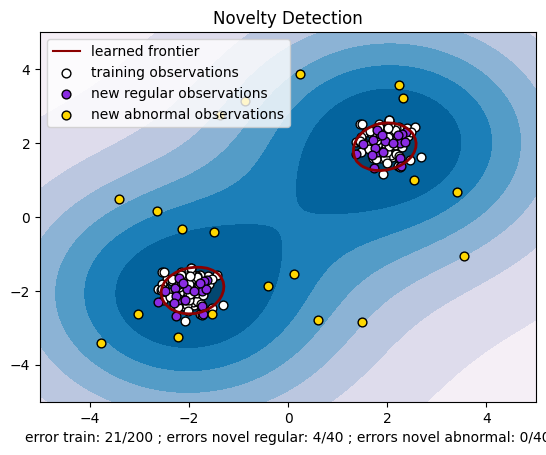

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.font_manager
from sklearn.inspection import DecisionBoundaryDisplay

# Set up the plot
_, ax = plt.subplots()

# Generate grid for the boundary display
xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
X = np.c_[xx.ravel(), yy.ravel()]  # Flatten the grid into a 2D array

# Plot decision boundary and contours
DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method="decision_function", plot_method="contourf", ax=ax, cmap="PuBu"
)
DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method="decision_function", plot_method="contour", ax=ax, levels=[0], colors="darkred", linewidths=2
)

# Plot scatter points for training data, test data, and outliers
s = 40
b1 = ax.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k", label="training observations")
b2 = ax.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k", label="new regular observations")
c = ax.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k", label="new abnormal observations")

# Add legend
ax.legend(handles=[mlines.Line2D([], [], color="darkred", label="learned frontier"), b1, b2, c], loc="upper left")

# Set labels and title
ax.set(
    xlabel=f"error train: {n_error_train}/200 ; errors novel regular: {n_error_test}/40 ; errors novel abnormal: {n_error_outliers}/40",
    title="Novelty Detection",
    xlim=(-5, 5),
    ylim=(-5, 5)
)

plt.show()
